Start State


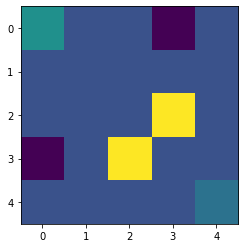

Our Right or the Agents Left


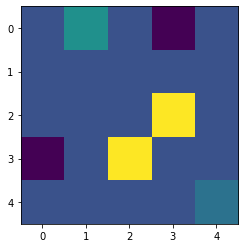

----------------
Our Right or the Agents Left


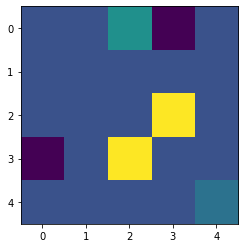

----------------
Our Right or the Agents Left


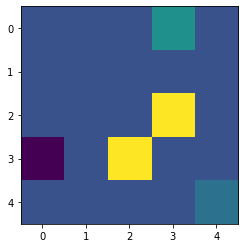

----------------
Down


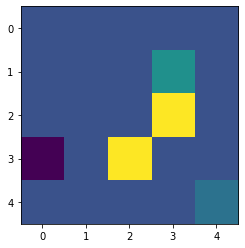

----------------
Down


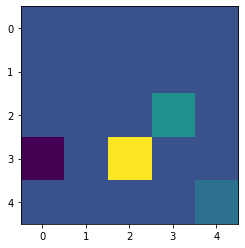

----------------
Our Left or the Agents Right


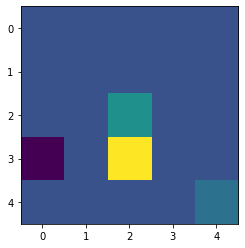

----------------
Down


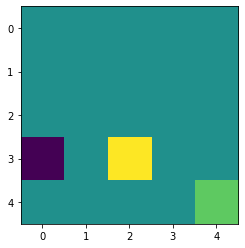

----------------
Our Right or the Agents Left


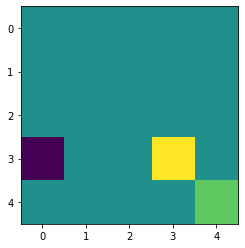

----------------
Our Right or the Agents Left


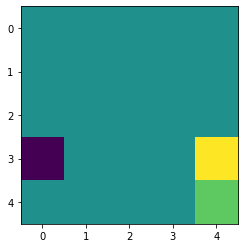

----------------
Down


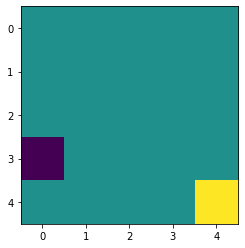

The Final Reward is 5


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import random

class environment:
    def __init__(self,type_of_env:str,epsilon:float):

        # No of number of states = 25 - Requirement 1
        self.environment = np.zeros((5,5))
        
        self.max_timesteps = 50
        self.current_time_steps = 0
        
        self.goal_pos = [4,4]
        self.agent_current_pos = [0,0]

        self.environment[tuple(self.agent_current_pos)] = 1
        self.environment[tuple(self.goal_pos)] = 0.5

        # Collection of Rewards (the keys) and associated values (the states). -> Total No of Rewards = 4 -> Requirement 3
        self.reward_states = [{-1:[0,3]},{-1:[3,0]},{3:[2,3]},{3:[3,2]}]
        
        # Setting the colors for the reward states in the environment.
        for reward_state in self.reward_states:
            for reward, position in reward_state.items():
                self.environment[tuple(position)] = reward

        # Either Deterministic or stochastic.
        self.environment_type = type_of_env

        # This determines the exploitation vs exploration phase.
        self.epsilon = epsilon

        # This tracks the reward for the agent.
        self.cumulative_reward = 0

    def reset(self):
        # Here we are essentially resetting all the values.
        self.current_time_steps = 0
        self.cumulative_reward = 0

        self.goal_pos = [4,4]
        self.agent_current_pos = [0,0]
        
        self.environment = np.zeros((5,5))

        self.reward_states = [{-1:[0,3]},{-1:[3,0]},{3:[2,3]},{3:[3,2]}]
        
        for reward in self.reward_states:
            for reward, position in reward.items():
                self.environment[tuple(position)] = reward

        self.environment[self.agent_current_pos] = 1
        self.environment[self.goal_pos] = 0.5
    
    def step(self, action):

        # We are checking wether the environment is deterministic or stochastic
        if self.environment_type == 'deterministic':
            # In Deterministic environments, there is no use for epsilon as all the actions are deterministic / greedy / pre-determined.

            self.epsilon = 0
            self.current_time_steps +=1

            # The agent can take a maximum of 4 actions i.e Up, Down, Left or Right. -> Requirement 2
            if action == 0:
                print('Up')
                self.agent_current_pos[0] -=1

            elif action == 1:
                print('Down')
                self.agent_current_pos[0] +=1

            elif action == 2:
                print('Our Left or the Agents Right')
                self.agent_current_pos[1] -=1

            elif action == 3:
                print('Our Right or the Agents Left')
                self.agent_current_pos[1] +=1
            
            else:
                print('Action was undefined')

            # Here we are clipping the agents position to be in the environment (i.e if the agent goes out of env, we shall clip him to be inside the environment).
            self.agent_current_pos = list(np.clip(self.agent_current_pos, 0, 4))

            # Here we are calculating the reward (i.e. the cumulative reward) and deleting that reward state from the collection of the reward states.
            breaker = False
            for reward_state_counter in range(len(self.reward_states)):
                for reward, state in self.reward_states[reward_state_counter].items():
                    # if the reward state matches the agents, sum the cum reward and delete that particular reward state space.

                    if state == self.agent_current_pos:
                        self.cumulative_reward += reward
                        del self.reward_states[reward_state_counter]
                        breaker = True
                        break

                if breaker:
                    break
            
            # We are now re-visualizing the environment
            self.environment = np.zeros((5,5)) 

            for reward_state_counter in range(len(self.reward_states)):
                for reward, position in self.reward_states[reward_state_counter].items():
                    self.environment[tuple(position)] = reward
                
            self.environment[tuple(self.goal_pos)] = 0.5
            self.environment[tuple(self.agent_current_pos)] = 1
            
            # if the agent has reached the final state then delete the 
            if (self.agent_current_pos == self.goal_pos) or (self.current_time_steps == self.max_timesteps):
                done_or_not = True
            
            else:
                done_or_not = False

            return self.environment.flatten, self.cumulative_reward, done_or_not, self.current_time_steps

        elif self.environment_type == 'stochastic':
            self.current_time_steps +=1
            print('Current Agent POS', str(self.agent_current_pos))

            if action == 0:
                print("Up")
                self.agent_current_pos = self.get_final_action([-1,0],[1,0],[0,1])

            elif action == 1:
                print("Down")
                self.agent_current_pos = self.get_final_action([1,0],[-1,0],[0,-1])

            elif action == 2:
                print("Our Left or the Agents Right")
                self.agent_current_pos = self.get_final_action([0,-1],[-1,0],[0,1])

            elif action == 3:
                print("Our Right or the Agents Left")
                self.agent_current_pos = self.get_final_action([0,1],[1,0],[0,-1])

            else:
                print('action was undefined')

            print('Final Agent POS', str(self.agent_current_pos))
            
            breaker = False
            for reward_state_counter in range(len(self.reward_states)):
                for reward, state in self.reward_states[reward_state_counter].items():
                    if state == self.agent_current_pos:
                        self.cumulative_reward += reward
                        del self.reward_states[reward_state_counter]
                        breaker = True
                        break

                if breaker:
                    break
            
            # We are now re-visualizing the environment
            self.environment = np.zeros((5,5)) 
            
            for reward_state_counter in range(len(self.reward_states)):
                for reward, position in self.reward_states[reward_state_counter].items():
                    self.environment[tuple(position)] = reward
        
            self.environment[tuple(self.goal_pos)] = 0.5
            self.environment[tuple(self.agent_current_pos)] = 1
            
            if (self.agent_current_pos == self.goal_pos) or (self.current_time_steps == self.max_timesteps):
                done_or_not = True
            
            else:
                done_or_not = False

            return self.environment.flatten, self.cumulative_reward, done_or_not, self.current_time_steps

    def get_final_action(self, action1, action2, action3):

        """
        This function gets the final action for the "stochastic" modeled environment.
        
        For example take Epsilon as 0.7
        
        Then when we generate the random no, and if it is in the range of 0 - 0.7 (or 0.69999), then we take random exploratory actions.
        When we generate the random no, and if its is in the range of 0.7 - 1, then we take the greedy (or pre-determined) step in our case.
        Please note that at the moment the steps are chosen arbritrarily and not based the next states (like if there is a reward waiting in the 
        next state, then in the current version of the environment, we are not bothering about that, we are still going ahead with predetermined states
        with a chance of taking a random action).
        """
    
        random_n_number = random.uniform(0, 1)
        print('randn is', random_n_number)

        random_action_proba = self.epsilon
        old_pos = self.agent_current_pos

        if random_n_number > random_action_proba:
            self.agent_current_pos = [action1[x]+self.agent_current_pos[x] for x in range(len((self.agent_current_pos)))]
            
        elif (random_n_number >= random_action_proba/2) and (random_n_number < random_action_proba):
            self.agent_current_pos = [action2[x]+self.agent_current_pos[x] for x in range(len((self.agent_current_pos)))]

        elif (random_n_number < random_action_proba/2):
            self.agent_current_pos = [action3[x]+self.agent_current_pos[x] for x in range(len((self.agent_current_pos)))]

        else:
            raise ValueError('A Very Bad Probability thing happened.')

        self.get_action_comparison(old_pos,self.agent_current_pos)

        self.agent_current_pos = list(np.clip(self.agent_current_pos, 0, 4))
        return self.agent_current_pos


    def get_action_comparison(self,old_pos, new_pos):
        # This function tells us whether the final step the agent took after completing stochastic decision.

        shift = [old_pos[i]-new_pos[i] for i in range(len(new_pos))]

        if shift == [-1,0]: 
            print('The Agent Ended Up Going Down')
        elif shift == [1,0]:
            print('The Agent Ended Up Going Up')

        elif shift == [0,-1]:
            print('The Agent Ended Up Going Right')

        elif shift == [0,1]:
            print('The Agent Ended Up Going Left')

    def render(self):
        plt.imshow(self.environment)
        plt.show()

# The following lines of code are for demonstrating the environment under random inputs.
# sto = environment(type_of_env='deterministic',epsilon=0.3)
# print('Start State')
# sto.render()
# for i in range(10):
    
#     action = random.randrange(0,4)
#     observation, reward, done, _ = sto.step(action)
#     if done:
#         sto.render()
#         break
#     else:
#         sto.render()
    
#     print('----------------')
# sto.reset()
# print("The Final Reward is",reward)


# The following lines of code are for demonstrating the environment under predefined inputs.
sto = environment(type_of_env='deterministic',epsilon=0.3)
print('Start State')
sto.render()
for action in [3,3,3,1,1,2,1,3,3,1]:
    observation, reward, done, _ = sto.step(action)
    if done:
        sto.render()
        break
    else:
        sto.render()
    
    print('----------------')
sto.reset()
print("The Final Reward is",reward)